In [1]:
import csv

import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split

RANDOM_SEED = 42

2024-06-01 09:51:56.682972: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-06-01 09:52:04.013437: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-06-01 09:52:04.013466: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-06-01 09:52:04.776123: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-06-01 09:52:05.659204: I tensorflow/core/platform/cpu_feature_guar

# Specify each path

In [2]:
dataset = 'model/keypoint_classifier/keypoint.csv'
model_save_path = 'model/keypoint_classifier/keypoint_classifier.hdf5'
tflite_save_path = 'model/keypoint_classifier/keypoint_classifier.tflite'

# Set number of classes

In [3]:
NUM_CLASSES = 5

# Dataset reading

In [4]:
X_dataset = np.loadtxt(dataset, delimiter=',', dtype='float32', usecols=list(range(1, (21 * 2) + 1)))

In [5]:
y_dataset = np.loadtxt(dataset, delimiter=',', dtype='int32', usecols=(0))

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X_dataset, y_dataset, train_size=0.75, random_state=RANDOM_SEED)

# Model building

In [7]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input((21 * 2, )),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(20, activation='relu'),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(NUM_CLASSES, activation='softmax')
])

2024-06-01 09:52:24.353450: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-06-01 09:52:31.974116: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-06-01 09:52:31.974263: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-

In [8]:
model.summary()  # tf.keras.utils.plot_model(model, show_shapes=True)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dropout (Dropout)           (None, 42)                0         
                                                                 
 dense (Dense)               (None, 20)                860       
                                                                 
 dropout_1 (Dropout)         (None, 20)                0         
                                                                 
 dense_1 (Dense)             (None, 10)                210       
                                                                 
 dense_2 (Dense)             (None, 5)                 55        
                                                                 
Total params: 1125 (4.39 KB)
Trainable params: 1125 (4.39 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [9]:
# Model checkpoint callback
cp_callback = tf.keras.callbacks.ModelCheckpoint(
    model_save_path, verbose=1, save_weights_only=False)
# Callback for early stopping
#es_callback = tf.keras.callbacks.EarlyStopping(patience=20, verbose=1)

In [10]:
# Model compilation
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Model training

In [11]:
model.fit(
    X_train,
    y_train,
    epochs=1000,
    batch_size=128,
    validation_data=(X_test, y_test),
    callbacks=[cp_callback]
)

Epoch 1/1000


2024-06-01 09:52:34.962916: I external/local_tsl/tsl/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2024-06-01 09:52:38.567462: I external/local_xla/xla/service/service.cc:168] XLA service 0x55cc47957880 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2024-06-01 09:52:38.567503: I external/local_xla/xla/service/service.cc:176]   StreamExecutor device (0): NVIDIA GeForce RTX 3050 Laptop GPU, Compute Capability 8.6
2024-06-01 09:52:38.572835: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2024-06-01 09:52:39.010804: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:454] Loaded cuDNN version 8902
I0000 00:00:1717215759.111628    6858 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


20/31 [==================>...........] - ETA: 0s - loss: 1.5485 - accuracy: 0.2613  
Epoch 1: saving model to model/keypoint_classifier/keypoint_classifier.hdf5
31/31 [==============================] - 7s 9ms/step - loss: 1.5219 - accuracy: 0.2793 - val_loss: 1.4029 - val_accuracy: 0.3979
Epoch 2/1000
23/31 [=====================>........] - ETA: 0s - loss: 1.4400 - accuracy: 0.3359
Epoch 2: saving model to model/keypoint_classifier/keypoint_classifier.hdf5


/home/deadsoul/.local/lib/python3.11/site-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


31/31 [==============================] - 0s 8ms/step - loss: 1.4299 - accuracy: 0.3392 - val_loss: 1.3286 - val_accuracy: 0.4116
Epoch 3/1000
17/31 [===============>..............] - ETA: 0s - loss: 1.3821 - accuracy: 0.3594
Epoch 3: saving model to model/keypoint_classifier/keypoint_classifier.hdf5
31/31 [==============================] - 0s 4ms/step - loss: 1.3748 - accuracy: 0.3591 - val_loss: 1.2555 - val_accuracy: 0.4637
Epoch 4/1000
22/31 [====================>.........] - ETA: 0s - loss: 1.3242 - accuracy: 0.3963
Epoch 4: saving model to model/keypoint_classifier/keypoint_classifier.hdf5
31/31 [==============================] - 0s 4ms/step - loss: 1.3157 - accuracy: 0.4024 - val_loss: 1.1818 - val_accuracy: 0.5210
Epoch 5/1000
19/31 [=================>............] - ETA: 0s - loss: 1.2697 - accuracy: 0.4260
Epoch 5: saving model to model/keypoint_classifier/keypoint_classifier.hdf5
31/31 [==============================] - 0s 5ms/step - loss: 1.2564 - accuracy: 0.4310 - val_loss

In [12]:
# Model evaluation
val_loss, val_acc = model.evaluate(X_test, y_test, batch_size=128)

11/11 [==============================] - 0s 2ms/step - loss: 0.2473 - accuracy: 0.9495


In [13]:
# Loading the saved model
model = tf.keras.models.load_model(model_save_path)

In [14]:
# Inference test
predict_result = model.predict(np.array([X_test[0]]))
print(np.squeeze(predict_result))
print(np.argmax(np.squeeze(predict_result)))

1/1 [==============================] - 0s 252ms/step
[0.02636659 0.5374707  0.41371438 0.00121624 0.02123214]
1


# Confusion matrix

41/41 [==============================] - 0s 730us/step


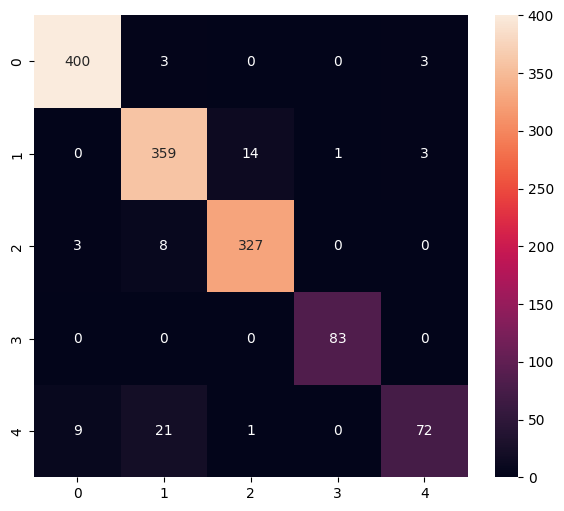

Classification Report
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       406
           1       0.92      0.95      0.93       377
           2       0.96      0.97      0.96       338
           3       0.99      1.00      0.99        83
           4       0.92      0.70      0.80       103

    accuracy                           0.95      1307
   macro avg       0.95      0.92      0.93      1307
weighted avg       0.95      0.95      0.95      1307



In [15]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

def print_confusion_matrix(y_true, y_pred, report=True):
    labels = sorted(list(set(y_true)))
    cmx_data = confusion_matrix(y_true, y_pred, labels=labels)
    
    df_cmx = pd.DataFrame(cmx_data, index=labels, columns=labels)
 
    fig, ax = plt.subplots(figsize=(7, 6))
    sns.heatmap(df_cmx, annot=True, fmt='g' ,square=False)
    ax.set_ylim(len(set(y_true)), 0)
    plt.show()
    
    if report:
        print('Classification Report')
        print(classification_report(y_test, y_pred))

Y_pred = model.predict(X_test)
y_pred = np.argmax(Y_pred, axis=1)

print_confusion_matrix(y_test, y_pred)

# Convert to model for Tensorflow-Lite

In [23]:
# Save as a model dedicated to inference
model.save(model_save_path, include_optimizer=False)

/home/deadsoul/.local/lib/python3.11/site-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [25]:
# Transform model (quantization)

converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
tflite_quantized_model = converter.convert()

open(tflite_save_path, 'wb').write(tflite_quantized_model)

INFO:tensorflow:Assets written to: /tmp/tmp3c4i2tuu/assets


INFO:tensorflow:Assets written to: /tmp/tmp3c4i2tuu/assets
2024-06-01 11:55:23.484145: W tensorflow/compiler/mlir/lite/python/tf_tfl_flatbuffer_helpers.cc:378] Ignored output_format.
2024-06-01 11:55:23.484187: W tensorflow/compiler/mlir/lite/python/tf_tfl_flatbuffer_helpers.cc:381] Ignored drop_control_dependency.
2024-06-01 11:55:23.484361: I tensorflow/cc/saved_model/reader.cc:83] Reading SavedModel from: /tmp/tmp3c4i2tuu
2024-06-01 11:55:23.485105: I tensorflow/cc/saved_model/reader.cc:51] Reading meta graph with tags { serve }
2024-06-01 11:55:23.485123: I tensorflow/cc/saved_model/reader.cc:146] Reading SavedModel debug info (if present) from: /tmp/tmp3c4i2tuu
2024-06-01 11:55:23.487535: I tensorflow/cc/saved_model/loader.cc:233] Restoring SavedModel bundle.
2024-06-01 11:55:23.515684: I tensorflow/cc/saved_model/loader.cc:217] Running initialization op on SavedModel bundle at path: /tmp/tmp3c4i2tuu
2024-06-01 11:55:23.524233: I tensorflow/cc/saved_model/loader.cc:316] SavedModel

6588

In [26]:
interpreter = tf.lite.Interpreter(model_path=tflite_save_path)
interpreter.allocate_tensors()

In [27]:
# Get I / O tensor
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

In [28]:
interpreter.set_tensor(input_details[0]['index'], np.array([X_test[0]]))

In [29]:
%%time
# Inference implementation
interpreter.invoke()
tflite_results = interpreter.get_tensor(output_details[0]['index'])

CPU times: user 146 µs, sys: 13 µs, total: 159 µs
Wall time: 121 µs


In [30]:
print(np.squeeze(tflite_results))
print(np.argmax(np.squeeze(tflite_results)))

[0.02636658 0.53747076 0.4137142  0.00121624 0.02123214]
1
